In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv("./WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv") #pd.read_csv(./+檔案名)
df.shape #看資料有多少列和欄 (9134行# ,24欄)

(9134, 24)

In [4]:
df["Engaged"] = df["Response"].apply(lambda x:0 if x=="No" else 1)
engagement_rate_df = pd.DataFrame(df.groupby("Engaged")["Response"].count()/df.shape[0]*100.0)
print(engagement_rate_df.T) #.T可以轉置pandas資料框 ->欄和行轉換
#response:14% no-response:86%                                                                             # aggfunc=len用來計數



Engaged           0          1
Response  85.679877  14.320123


In [5]:
#Sales Channel,Response的關係
engagement_by_sales_channel_df = pd.pivot_table(df,values="Response",index="Sales Channel",columns="Engaged",aggfunc=len).fillna(0.0)
engagement_by_sales_channel_df.columns = ["Not Engaged","Engaged"]                         # fillna(指定替換空值的方式)-->用0.0替換所有的空值
print(engagement_by_sales_channel_df)

               Not Engaged  Engaged
Sales Channel                      
Agent                 2811      666
Branch                2273      294
Call Center           1573      192
Web                   1169      156


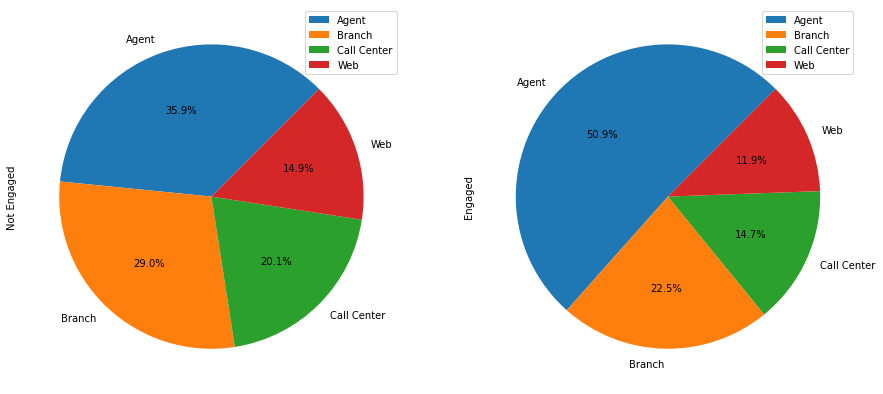

In [6]:
engagement_by_sales_channel_df.plot(
    kind="pie",
    figsize=(15,7),
    startangle=45, # 字的角度(?
    subplots=True,
    autopct=lambda x : "%0.1f%%" %x
)
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


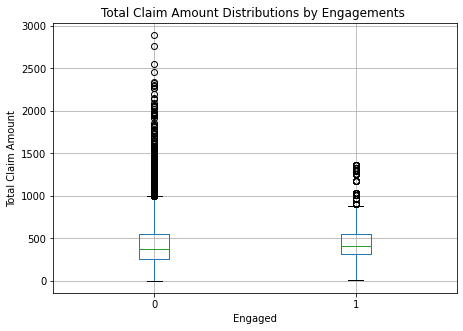

In [7]:
ax = df[["Engaged","Total Claim Amount"]].boxplot(
    by = "Engaged", #分群,
    showfliers = True, #設True會顯現離群值
    figsize = (7,5)
)
ax.set_xlabel("Engaged")
ax.set_ylabel("Total Claim Amount")
ax.set_title("Total Claim Amount Distributions by Engagements ")
plt.suptitle("") #把副標題拿掉
plt.show()

In [8]:
df.describe() #查看數值變數分布情形

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Engaged
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,0.143201
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.350297
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,0.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,0.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,0.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,0.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,1.000000


In [36]:
 #將有連續變數的名稱清單存成另一個變數
continues_vars = ["Customer Lifetime Value","Income","Monthly Premium Auto","Months Since Last Claim","Months Since Policy Inception","Number of Open Complaints","Number of Policies","Total Claim Amount"]

# continues_vars = 'y ~ Customer Lifetime Value+Income+Monthly Premium Auto+Months Since Last Claim+Months Since Policy Inception+Number of Open Complaints+Number of Policies+Total Claim Amount+Engaged'

In [43]:
import statsmodels.api as sm #使用statsmodels執行和解釋迴歸分析
#初始化邏輯迴歸模型，使用statsmodels套件中的logit函數
logit = sm.Logit( 
    df[["Engaged"]], #Engaged輸出的變數，模型要預測的結果
    df[continues_vars] #continues_vars輸入的變數
)
logit_fit = logit.fit() #訓練模型


Optimization terminated successfully.
         Current function value: 0.421189
         Iterations 6


In [45]:
logit_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9126
Method:                           MLE   Df Model:                            7
Date:                Tue, 10 May 2022   Pseudo R-squ.:                -0.02546
Time:                        12:56:03   Log-Likelihood:                -3847.1
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Customer Lifetime Value       -6.741e-06   5.04e-06     -1.337      0.181   -1.66e-05    3.14e-06
Income                        -2.857e-06   1.03e-06     -2.766      0.006   -4.88e-06   -8.33e-07
Monthly Premium Auto             -0.0084      0.001     -6.889      0.000      -0.011      -0.006
Months Since Last Claim          -0.0202      0.003     -7.238      0.000      -0.026      -0.015
Months Since Policy Inception    -0.0060      0.001     -6.148      0.000      -0.008      -0.004
Number of Open Complaints        -0.0829      0.034     -2.424      0.015      -0.150      -0.016
Number of Policies               -0.0810      0.013     -6.356      0.000      -0.106      -0.056
Total Claim Amount                0.0001      0.000      0.711      0.477      -0.000       0.000
=================================================================================================
"""

In [53]:
df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Engaged
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,0
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,0
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,0
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,0
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,0
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,1
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,0
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,0


In [63]:
gender_values,gender_lables = df["Gender"].factorize() #用factorize以數值對類別變數編碼
gender_values

array([0, 0, 0, ..., 1, 1, 1])

In [64]:
gender_lables

Index(['F', 'M'], dtype='object')

In [59]:
df["Education"]

0       Bachelor
1       Bachelor
2       Bachelor
3       Bachelor
4       Bachelor
          ...   
9129    Bachelor
9130     College
9131    Bachelor
9132     College
9133     College
Name: Education, Length: 9134, dtype: object

In [69]:
#以排序對類別變數編碼 --> pd.Categorical
categories = pd.Categorical(df["Education"],categories = ["High School or Below","Bachelor","College","Master","Doctor"])
#將編碼的變數放到資料框df中
df["GenderFactorized"] = gender_values
df["EducationFactorized"] = categories.codes #以編碼形式放入

In [70]:
df["EducationFactorized"] #因為categories有.codes所以以編碼形式呈現

0       1
1       1
2       1
3       1
4       1
       ..
9129    1
9130    2
9131    1
9132    2
9133    2
Name: EducationFactorized, Length: 9134, dtype: int8

In [73]:
#兩項類別變數編碼後，進行擬合邏輯迴歸模型
logit = sm.Logit(
    df[["Engaged"]],
    df[["GenderFactorized","EducationFactorized"]]
)
logit_fit = logit.fit()

Optimization terminated successfully.
         Current function value: 0.493068
         Iterations 6


In [74]:
logit_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9132
Method:                           MLE   Df Model:                            1
Date:                Tue, 10 May 2022   Pseudo R-squ.:                 -0.2005
Time:                        14:40:57   Log-Likelihood:                -4503.7
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
GenderFactorized       -1.1266      0.047    -24.116      0.000      -1.218      -1.035
EducationFactorized    -0.6256      0.021    -29.900      0.000      -0.667      -0.585
=======================================================================================
"""

In [75]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Engaged,GenderFactorized,EducationFactorized
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,0.143201,0.490037,1.281038
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.350297,0.499928,1.078521
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,0.000000,0.000000,0.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,0.000000,0.000000,0.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,0.000000,0.000000,1.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,0.000000,1.000000,2.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,1.000000,1.000000,4.000000


In [77]:
#合併連續變數和類別變數形成迴歸模型
logit = sm.Logit(
    df[["Engaged"]],
    df[["Customer Lifetime Value","Income","Monthly Premium Auto","Months Since Last Claim","Months Since Policy Inception","Number of Open Complaints","Number of Policies","Total Claim Amount"]]
)
logit_fit = logit.fit()

Optimization terminated successfully.
         Current function value: 0.421189
         Iterations 6


In [78]:
logit_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9126
Method:                           MLE   Df Model:                            7
Date:                Tue, 10 May 2022   Pseudo R-squ.:                -0.02546
Time:                        14:48:14   Log-Likelihood:                -3847.1
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Customer Lifetime Value       -6.741e-06   5.04e-06     -1.337      0.181   -1.66e-05    3.14e-06
Income                        -2.857e-06   1.03e-06     -2.766      0.006   -4.88e-06   -8.33e-07
Monthly Premium Auto             -0.0084      0.001     -6.889      0.000      -0.011      -0.006
Months Since Last Claim          -0.0202      0.003     -7.238      0.000      -0.026      -0.015
Months Since Policy Inception    -0.0060      0.001     -6.148      0.000      -0.008      -0.004
Number of Open Complaints        -0.0829      0.034     -2.424      0.015      -0.150      -0.016
Number of Policies               -0.0810      0.013     -6.356      0.000      -0.106      -0.056
Total Claim Amount                0.0001      0.000      0.711      0.477      -0.000       0.000
=================================================================================================
"""